# Linear Regression Examples
This notebook contains three examples (each of increasing complexity) of linear regression:

1. [Simple Linear Regression - Between Two Variables](#one)
2. [Multiple Linear Regression - Numerical Data Only](#two)
3. [Multiple Linear Regression - Mixed Data](#three)
 
As a reminder, below are the assumptions of Linear Regression Models:
* **Linearity** - linear relationship between X and y 
* **No noise (aka: Outliers)** in the data
* **No Collinearity** - With multiple linear regression, no multicollinearity bewteen features
* **Normally Distributed Residuals (Optional)** 
* **No autocorrelation** in the data (residuals)
* **Homoscedastic** Data (residuals)



---
#  <a name='one'></a>1.Simple Linear Regression Between Two Variables

---
## 1 - Objective
Using salary data with two data points (years experience and salary), attempt to predict a given salary based upon an years of experience.

---
## 2 - Gather Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

slr = pd.read_csv('data/salary.csv')
slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
slr.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


---
## 3 - Clean Data
Because this dataset is so small and is contrived, there is no major cleaning that needs to be done. The only change I make is to rename the columns to make them easier to read

In [6]:
slr.rename(columns={"YearsExperience": "exp", "Salary": "salary"}, inplace=True)
slr.head(5)

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


---
## 4 - Data Exploration

### First I create my X and y variables

In [21]:
# Defining the X and y variables
# X = years of  experience (independent feature variable)
# y = salary (dependent outcome variable)
X = slr['exp']
y = slr['salary']

### Check 1. Ensure Linear Relationship between X and y

<Figure size 360x360 with 0 Axes>

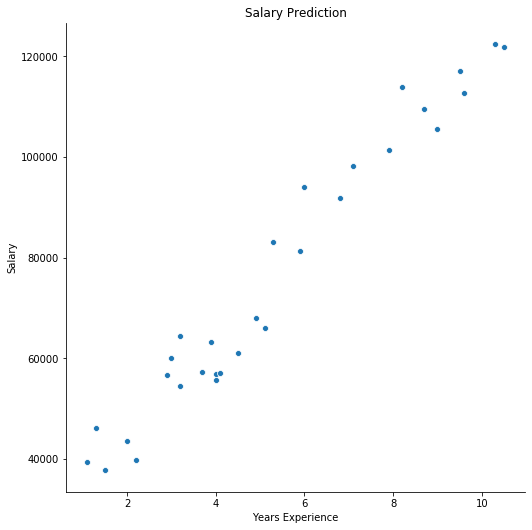

Correlation Coefficient:0.9782416184887599


In [22]:
# Check 1a. Check linearity visually with a scatter plot
plt.figure(figsize=(5,5))
sns.pairplot(slr,x_vars=['exp'],y_vars=['salary'], height=7, kind='scatter')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

# Check 1b. Check linearity statisticlly with corrleation coefficient (r).

#  There are many methods for calculating r, below I show 3:

# Numpy
# print('Correlation Coefficient (r)')
# print(np.corrcoef(X, y))

# Pandas
#print(X.corr(y))
#print(y.corr(X))

# Scipy
# print(scipy.stats.linregress(X, y)) # note this gives all stats
result = scipy.stats.linregress(X,y)
print(f'Correlation Coefficient:{result.rvalue}')

### The correlation coefficient(r) of 0.9782 denotes a highly positive linear relationship and the scatter plot also visually confirms high positive collinearity between salary and years experience

### Check 2. Search for Outliers
The chart above shows that there are really no outliers, but I double check statistically below

## Box plots are good for visual outlier checks

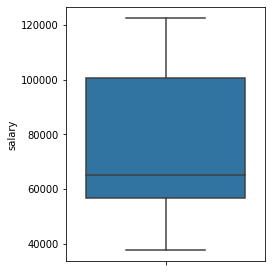

In [24]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(y=y, data=slr)
fig.tight_layout(pad=1.5)

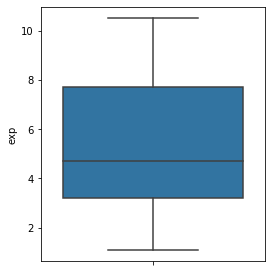

In [25]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(y=X, data=slr)
fig.tight_layout(pad=1.5)

### The boxplots above show that there are no outliers in either data point, next I check this stastically as well using the Z-Score

In [26]:
# Use Z-Score to Check For Outliers

# Z-score values (Note outliers would be  <= -3  OR >= 3)
# Here I use np.abs() because as long as no value exceeds 3, then
# there are no outliers
min_zscore = np.min(np.abs(scipy.stats.zscore(slr)))
max_zscore = np.max(np.abs(scipy.stats.zscore(slr)))

print(f'Min Z-Score Value: {min_zscore}')
print(f'Max Z-Score Value: {max_zscore}')

if abs(min_zscore)  < 3 and abs(max_zscore) < 3:
    print('z-Scores are between -3 and 3, so no extreme outliers present in data set')

Min Z-Score Value: 0.004778648529822813
Max Z-Score Value: 1.8588942781010314
z-Scores are between -3 and 3, so no extreme outliers present in data set


### All Z-Scores are between -3 and 3, so no extreme outliers present in data set

---
## 5 - Build Model
Now that the I know their is a linear relationship between X and y and no outliers in the data to deal with, I can create the model. 

In [30]:
# Split the data into training and testing sets: 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print('X_train and X-test original 1D arrays')
print(X_train.shape)
print(X_test.shape)

# Note: most models in scikit-learn are going to expect at least 2D
# arrays for the X variables. Currently my X variables are all 1D
# therefore, I must and a new axis to both to convert to 2D prior to
# fitting to the model
X_train = X_train[:, np.newaxis]
X_test  = X_test[:, np.newaxis]

print('\nX_train and X_test after adding new axis to make 2D array')
print(X_train.shape)
print(X_test.shape)

X_train and X-test original 1D arrays
(21,)
(9,)

X_train and X_test after adding new axis to make 2D array
(21, 1)
(9, 1)


In [31]:
# Instantiate Model and fit X and y training data to it
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Step 6. Model Predictions
y_pred = slr_model.predict(X_test)

---
## 6 - Model Evaluation

**Important Note** Because this sample analysis only has 9 test and predictor samples, I do not perform the other 3 assumption tests as a minimum fo 20 samples is required for even remotely decent results. 

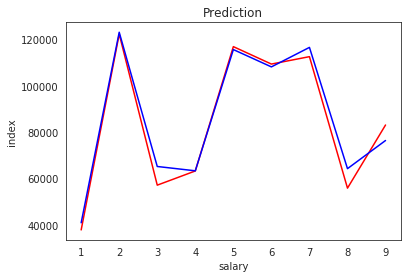

In [92]:
# Plotting the original y_test values against the predicted y values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

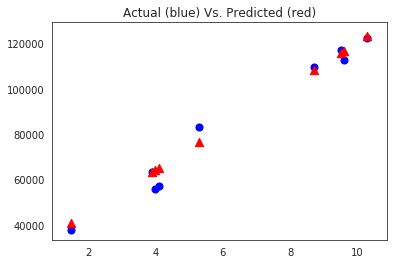

In [93]:
plt.scatter(x=X_test, y=y_test, s=50, label='Actual', color='b')
plt.scatter(x=X_test, y=y_pred, s=70, label='Predicted', marker='^', color='r')
plt.title('Actual (blue) Vs. Predicted (red)')
plt.show()

In [94]:
# Create dataframe and Calculate Mean Squared Error (MSE) Manually
d = {'salary_test_values': y_test, 'salary_predictions': y_pred}
df = pd.DataFrame(data=d)

df['error'] = df['salary_test_values'] - df['salary_predictions']
df['error_squared'] = df['error']**2

print(df)
print()

# Calculate Coefficient of Determination (r2)
r2  = metrics.r2_score(y_test, y_pred)
print(f'Coeff of Determination (R^2): {r2} \n')

# Final MSE calcultion, Error**2 / number of samples in test
#mse1 = sum(df['error_squared'])/len(y_test)
#print(f'MSE Manual Calculation: {mse1} \n')

# Scikit-Learn metrics formula used to calculate MSE
mse2 = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {round(mse2,2)} \n')

# MAE 
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: ${round(mae, 2)} \n')

# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
print(f'RMSE: ${round(rmse,2)}')

    salary_test_values  salary_predictions        error  error_squared
2              37731.0        40817.783270 -3086.783270   9.528231e+06
28            122391.0       123188.082589  -797.082589   6.353407e+05
13             57081.0        65154.462615 -8073.462615   6.518080e+07
10             63218.0        63282.410357   -64.410357   4.148694e+03
26            116969.0       115699.873560  1269.126440   1.610682e+06
24            109431.0       108211.664531  1219.335469   1.486779e+06
27            112635.0       116635.899689 -4000.899689   1.600720e+07
11             55794.0        64218.436486 -8424.436486   7.097113e+07
17             83088.0        76386.776158  6701.223842   4.490640e+07

Coeff of Determination (R^2): 0.9740993407213511 

MSE: 23370078.8 

MAE: $3737.42 

RMSE: $4834.26


In [95]:
print(f'Model Intercept: {slr_model.intercept_}')
print(f'Slope of the Line (Coefficient): {slr_model.coef_}')

Model Intercept: 26777.39134119764
Slope of the Line (Coefficient): [9360.26128619]


### **Based on the above results the best fit line formula according to the model is:**

### **y = 26777.39 + 9360.26 * X**

### One problem with this salary example is that X can really continue on forever and in reality there has to be some cap on salary regardless of the number of years experience. After all, people only live so long and salary does not necessarily move up linearly with experience in the real world.

In [96]:
# Test another X for 12 years of experience
# here done manually and run through the model

print('This is the final data point in the dataset')
print(slr.tail(1))
print()

# Manual Calculation
X_12 = slr_model.intercept_ + slr_model.coef_ * 12
print(f'Manual Calculation for 12 Years of Experience: {X_12}')

# Model Calculation
X_12 = pd.DataFrame({'exp': [12]}) #Insert just 1 value into a df

# Use the model to predict the one value
print(f'Model Results for 12 Years Experience: {slr_model.predict(X_12)}')

This is the final data point in the dataset
     exp    salary
29  10.5  121872.0

Manual Calculation for 12 Years of Experience: [139100.52677552]
Model Results for 12 Years Experience: [139100.52677552]


### Simple Linear Regression can be performed in one step using scipy.stats library, note that this method does not split the data therefore the results are close but not exactly the same (or as accurate) as the ML model

In [39]:
# All data simple linear regression stats, note that these results 
# come close  to the ML model predictions because the data set is 
# so small. 

slope, intercept, r_value, p_value, std_err = np.round(scipy.stats.linregress(X, y),4)

print(f'slope: {slope}')   # slope of the best fit line (m)
print(f'intercept: {intercept}') # y-intercept (b)
print(f'Correlation Coefficient (r): {r_value}')   # Correlation Coefficient (r)
print(f'p_value: {p_value}')   # hypothesis value (p) NOTE USED HERE
print(f'std_err: {std_err}')   # standard error of the regression (s)

slope: 9449.9623
intercept: 25792.2002
Correlation Coefficient (r): 0.9782
p_value: 0.0
std_err: 378.7546


---
# <a name='two'></a>2. Multiple Linear Regression - Numerical Data Only:

The link below provided the instruction and inspiration for this example:

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/


## 1 - Objective

This example attempts to determine if a businesses advertising spending helps with overall sales of widgets.  

* Let's pretend you work for the company that manufactures and markets this widget
* The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
* This general question might lead you to more specific questions:
    * Is there a relationship between ads and sales?
    * How strong is that relationship?
    * Which ad types contribute to sales?
    * What is the effect of each ad type of sales?
    * Given ad spending in a particular market, can sales be predicted?


## 2 - Gather Data
The data set used in this example contains information about Sales of 
a product in 200 different markets and the product advertising
budgets for TV, Radio, and Newspaper. Sales are measured in 
thousands of units/widgets, the advertising budgets in thousands of dollars.

Data Link: https://www.kaggle.com/sazid28/advertising.csv

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

mlr = pd.read_csv('data/advertising.csv')
mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## 3 - Clean Data

In [91]:
# Drop unecessary columns
mlr.drop('Unnamed: 0', axis=1, inplace=True)

In [92]:
mlr.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [93]:
# Check for null values
mlr.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 4 - Data Exploration

Because all regression models have to have X and y variable linearity, I check this first. 

### Check 1. Linear Relationship
Assure that a linear relationship exists between all X values and y values, in this case, the y value will be Sales.

Descriptive Statistics:
           TV   Radio  Newspaper   Sales
count  200.00  200.00     200.00  200.00
mean   147.04   23.26      30.55   14.02
std     85.85   14.85      21.78    5.22
min      0.70    0.00       0.30    1.60
25%     74.38    9.98      12.75   10.38
50%    149.75   22.90      25.75   12.90
75%    218.82   36.52      45.10   17.40
max    296.40   49.60     114.00   27.00


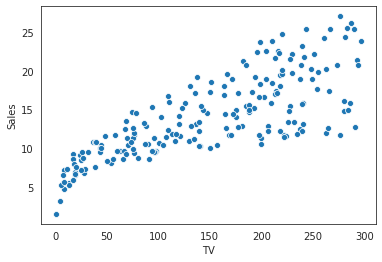

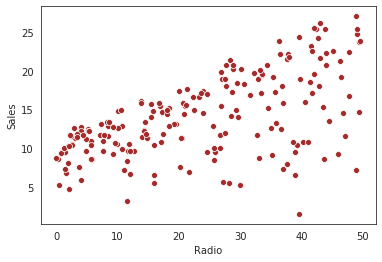

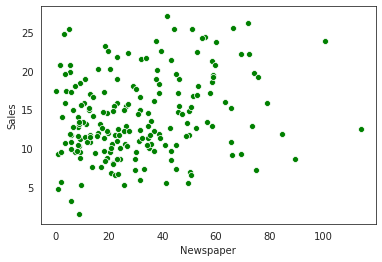

In [94]:
# Descriptive Statistics
print('Descriptive Statistics:')
print(np.round(mlr.describe(),2))

# Pairplot
#print('\nPairplot:')
#plt.figure()
#sns.pairplot(mlr, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='scatter')
#plt.show()

sns.scatterplot(data=mlr, x="TV", y="Sales")
plt.show()

sns.scatterplot(data=mlr, x="Radio", y="Sales", color='brown')
plt.show()

sns.scatterplot(data=mlr, x="Newspaper", y="Sales", color='g')
plt.show()

In [95]:
# Correlation Plot
correlation = np.round(mlr.corr(),4)

# Correlation Matrix
print('Correlation Matrix:')
print(correlation)

Correlation Matrix:
               TV   Radio  Newspaper   Sales
TV         1.0000  0.0548     0.0566  0.7822
Radio      0.0548  1.0000     0.3541  0.5762
Newspaper  0.0566  0.3541     1.0000  0.2283
Sales      0.7822  0.5762     0.2283  1.0000


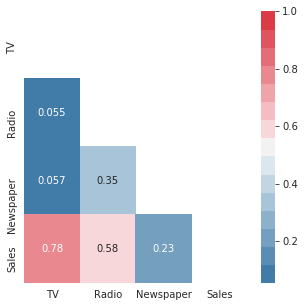

In [96]:
# This mask removes repeated values in the correlation matrix
# cutting the chart in half and making it easier to read
dropSelf = np.zeros_like(correlation)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(5,5))
sns.set_style("white")

# This uses a diverging palette where custom color values can be used
# note that n = # of different colors in the pallete
sns.heatmap(data=correlation, annot=True, cmap=sns.diverging_palette(240, 10, n=15), mask=dropSelf)

### From the above scatter plots and correlation matrix we can see that:
* TV has a strong positive linear correlation with Sales at 78.22%
* Radio has a moderate positive linear correlation with Sales at 57.62%
* Newspaper has a weak positive linear correlation with Sales at 22.83%

**The VIF factors are reasonable, so multicorrelation is not a huge factor**

## 5 - Build Model

In [97]:
# Create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = mlr[feature_cols] # Independent Features
y = mlr['Sales'] # Dependent Label/Target

# Instantiate the model and fit the data to it
lr2 = LinearRegression()
lr2 = lr2.fit(X,y)

### Multicollinearity Check Before Proceeding
Below I use the Variance Inflation Factor to check for multicollinearity between features the results per each featuer can be interpreted as such:
* Equal to 1 means not correlated
* Between 1 and 5 = moderately correlated
* Greater than 5 = highly correlated

The only dealbreaker is really > 5

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
      
    
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["Feature"] = X.columns 
  
# Calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)
      

     Feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


### The features are not highly correlated with one another, note this was already done above visually using the correlation matrix, however I am  just showing another method for determining multi-correlation statistically

### 6. Model Evaluation

In [99]:
# Model Intercept (b) Value
print(f'Model Intercept: {lr2.intercept_}')

# Model coefficients per feature value
list(zip(feature_cols, lr2.coef_))

Model Intercept: 2.9388893694594085


[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820442),
 ('Newspaper', -0.001037493042476273)]

### Note that the default coefficient values above are not intuitive. Remember that the original data Sales values were in units/widgets and were in thousands. So to convert this so that it is in units and makes more sense I multiply the coefficiants by 1000 below. Also note that the coeffecients here are the slope (or m  in the linear regression formula) and not correlation coefficients. 

In [100]:
 # multiplied by 1,000 to put into unit value
feature_coef = lr2.coef_ * 1000
list(zip(feature_cols, feature_coef))

[('TV', 45.76464545539761),
 ('Radio', 188.5300169182044),
 ('Newspaper', -1.037493042476273)]

### Interpreting the above Coefficient results
* An **increase of 1,000 dollars in TV ad spending** is associated with an **increase in Sales of 45.765 units** 
* An **increase of 1,000 dollars in Radio ad spending** is associated with an **increase in Sales of 188.53 units**
* An **increase of 1,000 dollars in Newspaper ad spending** is associated with an **decrease in Sales of -1.04 units**

Therefore TV and Radio ad spending are both positively associated with Sales whereas Newspaper ad spending is slightly negatively associated with Sales. 

At this point it is a good idea to train/test/split the X and y variables and re-evaluate the model to see if newspaper should be left in.

In [101]:
# Includes Newspaper
X = mlr[['TV', 'Radio', 'Newspaper']]
y = mlr['Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Re-Fit Model with the training data
lr2.fit(X_train, y_train)

# Make Sales Predictions
y_pred = lr2.predict(X_test)

# MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0668917082595206
1.4046514230328948


In [102]:
# Excluding Newspaper
X = mlr[['TV', 'Radio']]

# Regular y
y = mlr['Sales']

# Normalized y
#y_norm= np.log(mlr['Sales'])


# Split data into train and test sets

# Non-Normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Normalized
#X_train, X_test, y_train, y_test = train_test_split(X, y_norm, random_state=1)


# Re-Fit Model with the training data
lr2.fit(X_train, y_train)

# Make Sales Predictions
y_pred = lr2.predict(X_test)

# MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0477590411212607
1.3879034699382886


### Based on the above results, Newspaper should not be included in the regression analysis as this metric actually decreases potential sales. 

### The final MSA = 1.04 which means that on average the predicted results will be off by roughly 1,000 dollars up or down. For an annual salary this range seems acceptable. 

---

## More Error (residual) Checks
At this point, I know I have a linear relationship between all remaining X values and y. However, because this model is a multiple linear regression, I will next check to test the prediction errors to ensure that all the other regression model assumptions are good:

* Check 2. Independence (Autocorrelation)
* Check 3. Heteroscedacicity
* Check 4. Normally Distributed Errors/Residuals

In [103]:
# Create Dataframe to hold the desired values

data = {'y_test' : y_test, 'y_pred' : y_pred}
test_df = pd.DataFrame (data, columns = ['y_test','y_pred'])
test_df['residuals'] = test_df['y_test'] - test_df['y_pred']
residuals = test_df['residuals']

In [104]:
# Formula for max error of model residuals 
# Note: max_error() returns abs values

# Manually pulling abs max residual 
print(np.max(np.abs(residuals)))

# Using sklearn max_error function to pull max abs residual
print(metrics.max_error(y_test, y_pred))

4.417374092214526
4.417374092214526


---
### Check 2 - Independence (Autocorrelation)

In [105]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
durbin_watson(residuals)

2.1264724724046458

**There is no autocorrelation in the data as the value 2.13 is between 1.5 and 2.5**

---

### Check 3 - Heteroscedasticity

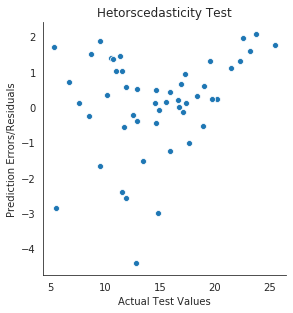

In [106]:
# Create Dataframe to hold the desired values
data = {'y_test' : y_test.values, 'residuals' : residuals.values}
test_df = pd.DataFrame (data, columns = ['y_test','residuals'])
test_df.shape

sns.pairplot(test_df,x_vars=['y_test'],y_vars=['residuals'], 
             height=4, kind='scatter')

plt.xlabel('Actual Test Values')
plt.ylabel('Prediction Errors/Residuals')
plt.title('Hetorscedasticity Test')
plt.show()

**Most of the errors fall between -2 and 2 and do not spread out as the salary rates increase. Only 5 or 10% of the metrics are larger than 2 either way. Because there are only 50 samples run in this example and the MAE was approximately 1, I am okay with this result.**

---
### Check 4 - Normal Distibution (Optional)

Residuals are not normally distributed
z-score: 13.659435419262314
p-value: 0.0010811632765096875


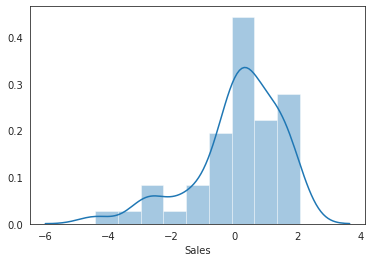

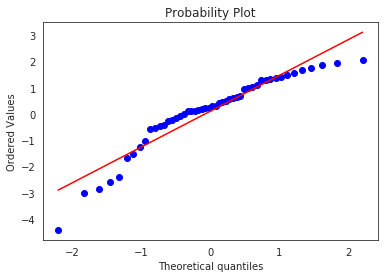

In [107]:
# Histogram and Normal Probability Plot  used to check distribution
# of residuals
residuals = y_test - y_pred

sns.distplot(residuals);
fig = plt.figure()

res = scipy.stats.probplot(residuals, plot=plt)

z, pval = scipy.stats.normaltest(residuals)

if(pval < 0.055):
    print ('Residuals are not normally distributed')

print(f'z-score: {z}')
print(f'p-value: {pval}')

**The residuals of the model are NOT normally distributed which could potentially be problematic. In this case I am not too woried as the overall average error (MAE) is only 1000 dollars either way. In the case with salaries and experience it is probable that there will be outliers in earnings potential based on experience and salary. In some rare cases people might luck into high salary jobs with little experience and vice-versa.**

---
## Model Intercept and Slope

In [108]:
print(f'Model Intercept: {lr2.intercept_}')
print(f'Slope of the Line (Coefficient): {lr2.coef_}')

Model Intercept: 2.9272373202664816
Slope of the Line (Coefficient): [0.04660234 0.18117959]


## Final best fit line formulas where x is in thousands of dollars are:

### X in normal dollar amounts (1,000 = 1,000)
* **y = 2.927 + (0.0466 * TV) + (0.1812 * Radio) +/- e**

### X in thousands (1,000 = 1)
* **y = 2.927 + (46 * TV) + (181 * Radio) +/- e**



## Regression Line Vs. Actuals Hyperplane Graph

Dial how to properly visualize multiple linear regression results, for example, should you create a hyperplane graph? 

https://www.kaggle.com/sangeet2893/multiple-linear-regression

---
# <a name='three'></a>3. Multiple Linear Regression: Mixed Data

## 1. Defining the Objective
To predict a movies IMDB score based upon relevant features which include both numerical and categorical features

## 2. Gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

movie_df = pd.read_csv('data/movies_final.csv')

In [2]:
print(movie_df.shape)
movie_df.head(5)

(177095, 12)


,mov_id,title,genre,year,director,dir_dth_yr,actr1,actr2,actr3,runtime,imdb_score,num_scores
0,tt0001184,Don Juan de Serrallonga,Drama,1910,Alberto Marro,1956,Dolores Puchol,Cecilio Rodriguez de la Vega,NaN,58,3.1,11
1,tt0001258,The White Slave Trade,Drama,1910,August Blom,1947,Ellen Diedrich,Victor Fabian,Julie Henriksen,45,5.7,79
2,tt0001498,The Battle of Trafalgar,Drama,1911,J. Searle Dawley,1949,Sydney Booth,Herbert Prior,James Gordon,51,7.2,5
3,tt0001790,"Les Miserables, Part 1: Jean Valjean",Drama,1913,Albert Capellani,1931,Henry Krauss,Henri Etievant,Maria Ventura,60,5.8,21
4,tt0001812,Oedipus Rex,Drama,1911,Theo Frenkel,1956,Suzanne de Baere,Theo Frenkel,NaN,56,5.8,6


## 3. Data Cleaning
There are a number of features that are obviously not useful for this analysis including:
* movide id
* title
* director death year
* director (could be useful, but too many possible values for my pc)
* actor 1 (could be useful, but too many possible values for my pc)
* actor 2 (could be useful, but too many possible values for my pc)
* actor 3 (could be useful, but too many possible values for my pc)
* year is irrelevant as this metric should have no bearing on future scores

In [3]:
# Only keep desired features
model_data = movie_df[['genre', 'runtime', 
                       'imdb_score', 'num_scores']]
model_data.head(5)

,genre,runtime,imdb_score,num_scores
0,Drama,58,3.1,11
1,Drama,45,5.7,79
2,Drama,51,7.2,5
3,Drama,60,5.8,21
4,Drama,56,5.8,6


### Next I limit the minimum number of votes per movie to 500, note that this drops the total number of samples down to ~41k from ~117k

In [4]:
print('Number of Votes >= 500')
model_data = model_data[(movie_df['num_scores'] >= 500)]

model_data.shape

Number of Votes >= 500


(41537, 4)

### Next I perform a null value check

In [5]:
model_data.isnull().sum()

genre         0
runtime       0
imdb_score    0
num_scores    0
dtype: int64

In [6]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41537 entries, 10 to 177088
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genre       41537 non-null  object 
 1   runtime     41537 non-null  int64  
 2   imdb_score  41537 non-null  float64
 3   num_scores  41537 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ MB


### Now that the data is cleaned and contains no nulls, I next move on to the exploratory analysis

## 4. Data Exploration

### First I check for linearity between the target and feature variables


Pairplot:


<Figure size 432x288 with 0 Axes>

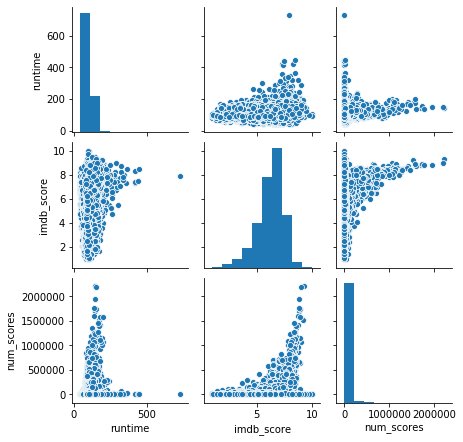

In [7]:
# Next I re-run the correlation matrix in order to 
# see if there is any improvement
# Correlation Matrix
# Pairplot
print('\nPairplot:')
plt.figure()
sns.pairplot(data=model_data, height=2)
plt.show()

### There is a relationship bewteen num_scores and imdb_score, however it is not linear as it curves upward exponentially. Therefore log transformation can be used here.  There also is a slight linear relationship between runtime and score, however there are a few outliers related to runtime, I delve into runtime next

In [8]:
# Check runtime for count of movies longer than 3.5 hours or 210 minutes

print('Number of Movies longer than 240 minutes:')
print(len(model_data[model_data['runtime'] >= 240]))
print()

print(model_data.runtime.describe())

Number of Movies longer than 240 minutes:
47

count    41537.000000
mean       103.896935
std         22.260172
min         45.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        729.000000
Name: runtime, dtype: float64


### Because the vast majority of movies are under 112 minutes. Because most movies are going to fall under 4 hours, I'm going to set this as the outlier threshold

In [9]:
model_data.shape

(41537, 4)

In [10]:
model_data = model_data[model_data['runtime'] < 240]

In [11]:
model_data.shape

(41490, 4)


Pairplot:


<Figure size 432x288 with 0 Axes>

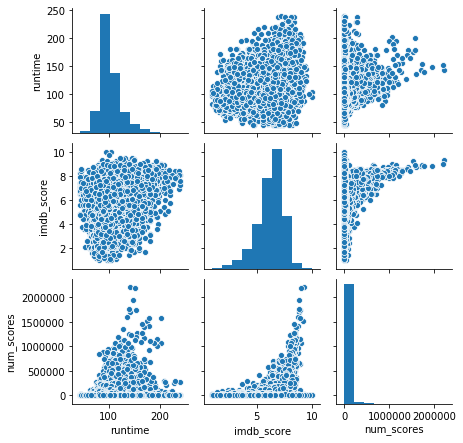

In [12]:
print('\nPairplot:')
plt.figure()
sns.pairplot(data=model_data, height=2)
plt.show()

### Runtime has now been cleaned up however num_scores has a huge range of values, see below

In [13]:
model_data.describe()

,runtime,imdb_score,num_scores
count,41490.000000,41490.000000,4.149000e+04
mean,103.667366,6.198412,1.881350e+04
std,21.009796,1.185923,7.378244e+04
min,45.000000,1.000000,5.000000e+02
25%,90.000000,5.600000,8.790000e+02
50%,99.000000,6.400000,1.883000e+03
75%,112.000000,7.000000,6.653000e+03
max,239.000000,10.000000,2.210134e+06


### Because all scores counts are relevant, I want to keep these outliers (especially since the overall scores seem to increase along with the number of scores). I will need to re-scale the data to account for this

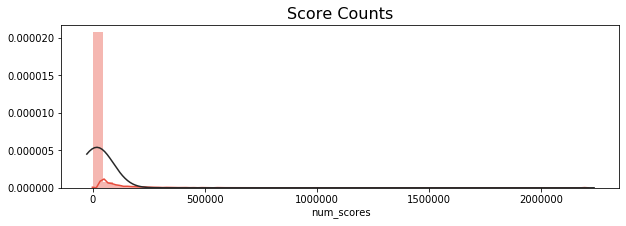

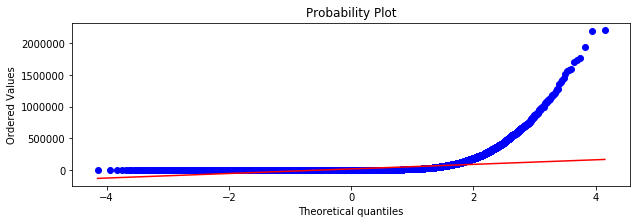

In [14]:
plt.figure(figsize=(10, 3))

# Histogram
sns.distplot(model_data['num_scores'],
             hist=True,
             kde=True,
             fit=scipy.stats.norm,
             color='#e74c3c')

plt.title('Score Counts', fontsize=16)
plt.show()


#Probabilty Plot
plt.figure(figsize=(10, 3))
res = scipy.stats.probplot(model_data['num_scores'],
                           plot=plt)
plt.show()

### Because the num_scores feature is highly right skewed, I can use log transformation to get it in a decent range for analysis

In [15]:
model_data['num_scores_trans'] = np.log(model_data['num_scores'])

In [16]:
model_data.head()

,genre,runtime,imdb_score,num_scores,num_scores_trans
10,Drama,68,7.0,2110,7.654443
14,Drama,85,6.8,728,6.590301
25,Drama,54,7.0,1889,7.543803
31,Drama,96,7.1,909,6.812345
34,Drama,61,7.0,1316,7.182352


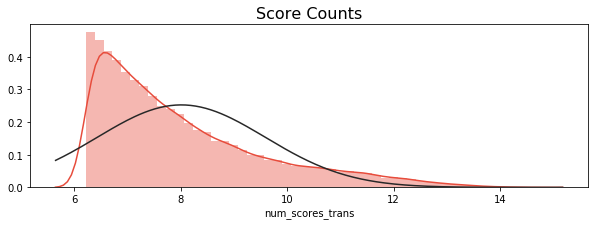

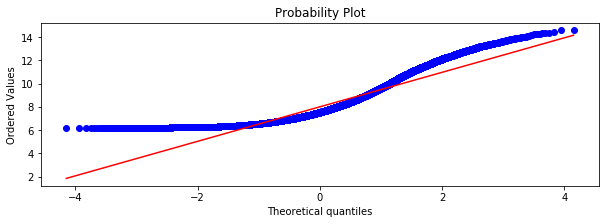

In [17]:
plt.figure(figsize=(10, 3))

# Histogram
sns.distplot(model_data['num_scores_trans'],
             hist=True,
             kde=True,
             fit=scipy.stats.norm,
             color='#e74c3c')

plt.title('Score Counts', fontsize=16)
plt.show()


#Probabilty Plot
plt.figure(figsize=(10, 3))
res = scipy.stats.probplot(model_data['num_scores_trans'],
                           plot=plt)
plt.show()

In [18]:
model_data['num_scores_trans'].describe()

count    41490.000000
mean         8.010676
std          1.580658
min          6.214608
25%          6.778785
50%          7.540622
75%          8.802823
max         14.608564
Name: num_scores_trans, dtype: float64


Pairplot:


<Figure size 432x288 with 0 Axes>

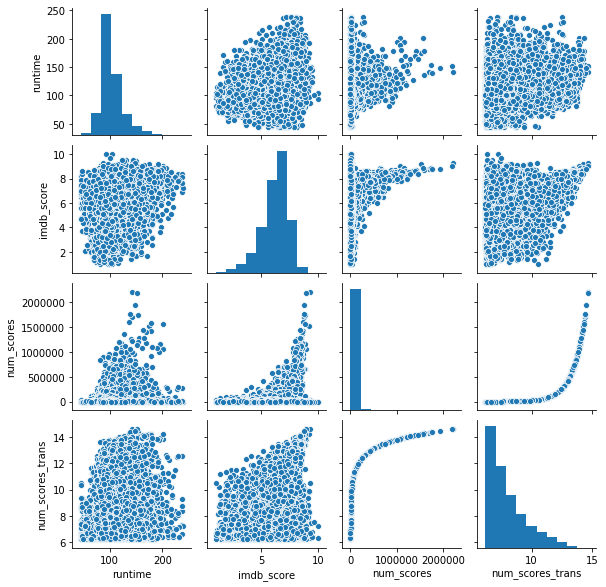

In [19]:
print('\nPairplot:')
plt.figure()
sns.pairplot(data=model_data, height=2)
plt.show()

In [20]:
scipy.stats.describe(model_data['num_scores_trans'])

DescribeResult(nobs=41490, minmax=(6.214608098422191, 14.608563705139963), mean=8.010675625923664, variance=2.498480579011569, skewness=1.1799071464197308, kurtosis=0.8349652618442853)

### The log transformation helped tame the skew, however it is still pretty high. This is due to the exponential nature of the metric counts. (TODO DIAL A BETTER WAY FOR THIS - MAYBE)

### Next I check the correlation between the features and the target variable

Correlation Matrix:
                   runtime  imdb_score  num_scores  num_scores_trans
runtime           1.000000    0.283398    0.155136          0.185915
imdb_score        0.283398    1.000000    0.189552          0.262061
num_scores        0.155136    0.189552    1.000000          0.600109
num_scores_trans  0.185915    0.262061    0.600109          1.000000


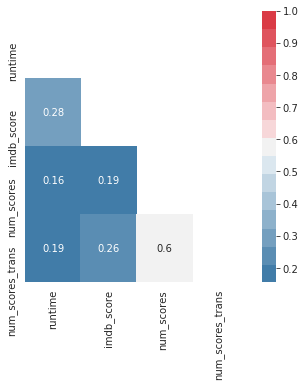

In [21]:
correlation = model_data.corr()

# Correlation Matrix Graph
dropSelf = np.zeros_like(correlation)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(5,5))
sns.set_style("white")
sns.heatmap(data=correlation, annot=True, cmap=sns.diverging_palette(240, 10, n=15), mask=dropSelf)

# Correlation Matrix
print('Correlation Matrix:')
print(correlation)

### A big takeaway here is that everything has low positive correlation. Since this is a multiple-linear analysis, which is good. 

### Before actually building the model, I need to check the target variables distribution. 

count    41490.000000
mean         6.198412
std          1.185923
min          1.000000
25%          5.600000
50%          6.400000
75%          7.000000
max         10.000000
Name: imdb_score, dtype: float64


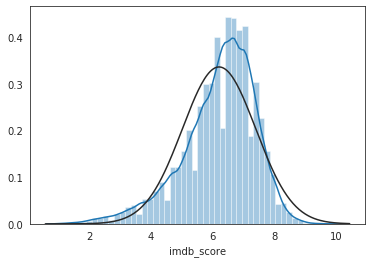

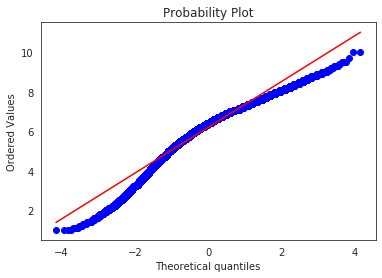

In [22]:
print(model_data['imdb_score'].describe())

#histogram and normal probability plot
sns.distplot(model_data['imdb_score'], fit=scipy.stats.norm);
fig = plt.figure()
res = scipy.stats.probplot(model_data['imdb_score'], plot=plt)

In [23]:
scipy.stats.describe(model_data['imdb_score'])

DescribeResult(nobs=41490, minmax=(1.0, 10.0), mean=6.198411665461556, variance=1.4064138766601733, skewness=-0.8608106574950878, kurtosis=1.0020829001343161)

### The target variable has a moderately left skew, and an acceptable outlier range, therefore I will not transform it. 

In [24]:
model_data.head()

,genre,runtime,imdb_score,num_scores,num_scores_trans
10,Drama,68,7.0,2110,7.654443
14,Drama,85,6.8,728,6.590301
25,Drama,54,7.0,1889,7.543803
31,Drama,96,7.1,909,6.812345
34,Drama,61,7.0,1316,7.182352


### Prior to building the model, I need to use one-hot-encoding to create dummy variables for the categorical column 'genre'

In [25]:
dumvars = pd.get_dummies(model_data['genre'],  prefix='genre', drop_first=True)                                                          
model_data = pd.concat([model_data, dumvars], axis=1) 

model_data.shape

(41490, 9)

In [26]:
model_data.head()

,genre,runtime,imdb_score,num_scores,num_scores_trans,genre_Comedy,genre_Drama,genre_Family,genre_Horror
10,Drama,68,7.0,2110,7.654443,0,1,0,0
14,Drama,85,6.8,728,6.590301,0,1,0,0
25,Drama,54,7.0,1889,7.543803,0,1,0,0
31,Drama,96,7.1,909,6.812345,0,1,0,0
34,Drama,61,7.0,1316,7.182352,0,1,0,0


## 5. Build The Model

Prior to building the model, I first create the desired features (here I'm going to test with score count log transformed and non-transformed)

In [27]:
# Regular Features

# Separate features into X the label/output into y 
feat1 = model_data.drop(columns = ['genre', 'imdb_score',
                                   'num_scores_trans'])
feat1.head()

,runtime,num_scores,genre_Comedy,genre_Drama,genre_Family,genre_Horror
10,68,2110,0,1,0,0
14,85,728,0,1,0,0
25,54,1889,0,1,0,0
31,96,909,0,1,0,0
34,61,1316,0,1,0,0


In [28]:
# Transformed Features

# Separate features into X the label/output into y 
feat2 = model_data.drop(columns = ['genre', 'imdb_score',
                                   'num_scores'])
feat2.head()

,runtime,num_scores_trans,genre_Comedy,genre_Drama,genre_Family,genre_Horror
10,68,7.654443,0,1,0,0
14,85,6.590301,0,1,0,0
25,54,7.543803,0,1,0,0
31,96,6.812345,0,1,0,0
34,61,7.182352,0,1,0,0


### Next I create the Target and Feature Variables

In [29]:
X1 = feat1    
X2 = feat2
y = model_data['imdb_score']  

# Instantiate the models
l1 = LinearRegression()
l2 = LinearRegression()

## 6.  Evaluating Models
The link below shows how to calculate various regression performance metrics by hand and through libraries:

https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

In [30]:
# Regular Model (no transformations)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=1)

# Re-Fit Model with the training data
l1.fit(X_train, y_train)

# Make Sales Predictions
y_pred = l1.predict(X_test)

# MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7988840181383761
1.0486931367471546


In [31]:
# Log Transformed Model

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=1)

# Re-Fit Model with the training data
l2.fit(X_train, y_train)

# Make Sales Predictions
y_pred = l2.predict(X_test)

# MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7850994255572269
1.0279670129846123


In [66]:
# Cross Validation Tests (More accurate than test/train split)
from sklearn.model_selection import cross_val_score

np.sqrt(-cross_val_score(LinearRegression(), 
                         X2,
                         y, 
                         scoring='neg_mean_squared_error', 
                         cv = 10)).mean()

1.050581966035001

In [33]:
# Real-World Predictions

# First I would get some real world values from 3 different new movies

# 1. Title: Hamilton, genre: Drama, runtime: 2 hrs 40 min, 
#                     score_count: 46,432, score: 8.6


mov1 = pd.DataFrame({'runtime': [160],
                     'num_scores_trans': [np.log(46432)],
                     'genre_Comedy': [0],
                     'genre_Drama': [1],
                     'genre_Family': [0],
                     'genre_Horror': [0]})

# Use the model to predict the one value
print(f'Hamilton Predicted Score: {round(l2.predict(mov1)[0],1)}')
print(f'Hamilton Actual Score: 8.6')

Hamilton Predicted Score: 7.7
Hamilton Actual Score: 8.6


In [80]:
# 2. Title: 1917, genre: Drama, runtime: 1 hrs 59 min, 
#                     score_count: 389121, score: 8.3


mov1 = pd.DataFrame({'runtime': [119],
                     'num_scores_trans': [np.log(389121)],
                     'genre_Comedy': [0],
                     'genre_Drama': [1],
                     'genre_Family': [0],
                     'genre_Horror': [0]})

# Use the model to predict the one value
print(f'1917 Predicted Score: {round(l2.predict(mov1)[0],1)}')
print(f'1917 Actual Score: 8.3')

1917 Predicted Score: 7.6
1917 Actual Score: 8.3


In [81]:
# 3. Title: Tenet, genre: Action, runtime: 2 hrs 30 min, 
#                     score_count: 389121, score: 7.8


mov1 = pd.DataFrame({'runtime': [150],
                     'num_scores_trans': [np.log(144858)],
                     'genre_Comedy': [0],
                     'genre_Drama': [0],
                     'genre_Family': [0],
                     'genre_Horror': [0]})

# Use the model to predict the one value
print(f'Tenet Predicted Score: {round(l2.predict(mov1)[0],1)}')
print(f'Tenet Actual Score: 7.8')

Tenet Predicted Score: 7.1
Tenet Actual Score: 7.8


### At this point the model comes (on average) within a point of the correct final score. These results aren't horrible, but they could definitely be better. I am most likely underfitting the data as I only have 3 overall features with low correlation with the target variable.  Increasing model complexity or adding some more potentially relevant features could help, below are some ideas:

* box office revenue
* actors
* director
* month released


### The main reason I didn't include actors and directors was due to my systems computational limitations. Ideally in a perfect world I would like to include these.

---
## Best-Fit Line 

In [36]:
# Model Intercept (b) Value
print(f'Model Intercept: {l2.intercept_}')

# Model coefficients per feature value
list(zip(feat2, l2.coef_))

Model Intercept: 3.265539665748218


[('runtime', 0.010843257326493277),
 ('num_scores_trans', 0.18357567420054755),
 ('genre_Comedy', 0.3899656726689872),
 ('genre_Drama', 0.7142948666531219),
 ('genre_Family', 0.3975628236162285),
 ('genre_Horror', -0.5195902445805242)]

In [75]:
# Best fit line formula
#y = b + sum(features * coeffs) + error

intercept = l2.intercept_
runtime_coef = l2.coef_[0]
num_scores_coef = l2.coef_[1]
comedy_coef = l2.coef_[2]
drama_coef = l2.coef_[3]
family_coef = l2.coef_[4]
horror_coef = l2.coef_[5]

print(f'runtime coef: {runtime_coef}')
print(f'num_scores coef: {num_scores_coef}')
print(f'comedy coef: {comedy_coef}')
print(f'drama coef: {drama_coef}')
print(f'family coef: {family_coef}')
print(f'horror coef: {horror_coef}')


# So according to the model, a Drama, with runtime of 120 minutes 
# and total # of 400 votes would (on average) have a score
# between the two below values two values (Using MAE ):

# low error best-fit line formula
low_error = (((intercept) + 
             (runtime_coef * 120) +
             (num_scores_coef * np.log(4000)) +
             (comedy_coef * 0) +
             (drama_coef * 0) +
             (family_coef * 0) +
             (horror_coef * 1)) - 0.7850994255572269)

# high error best-fit line formula
high_error = (((intercept) + 
             (runtime_coef * 120) +
             (num_scores_coef * np.log(4000)) +
             (comedy_coef * 0) +
             (drama_coef * 0) +
             (family_coef * 0) +
             (horror_coef * 1)) + (0.7850994255572269))

print(f'\nLowest Predicted Score: {round(low_error,1)}')
print(f'Highest Predicted Score: {round(high_error,1)}')

runtime coef: 0.010843257326493277
num_scores coef: 0.18357567420054755
comedy coef: 0.3899656726689872
drama coef: 0.7142948666531219
family coef: 0.3975628236162285
horror coef: -0.5195902445805242

Lowest Predicted Score: 4.8
Highest Predicted Score: 6.4


In [83]:
# Real-World Example Using Setup from Above

title = 'Come Play'
rtime = 136
score_cnt = 2597
com = 0
drm = 0
fam = 0
hor = 1
act_scr = 5.8 # Actual IMDB Score

# Feature Setup
mov1 = pd.DataFrame({'runtime': [rtime],
                     'num_scores_trans': [np.log(score_cnt)],
                     'genre_Comedy': [com],
                     'genre_Drama': [drm],
                     'genre_Family': [fam],
                     'genre_Horror': [hor]}) 

# Predict Score
print(f'{title} Predicted Score: {round(l2.predict(mov1)[0],1)}')
print(f'{title} Actual Score: {act_scr}')

Come Play Predicted Score: 5.7
Come Play Actual Score: 5.8
